In [1]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip, ImageSequenceClip, CompositeVideoClip, clips_array
import sys
%matplotlib inline

In [2]:
volume1 = np.genfromtxt("./Assignment2Start/volumeData", skip_header=1)

In [3]:
# volume = volume1.reshape((256,128,256)) # This gives mirror image
volume = volume1.reshape((256,256,128)) # height, depth, width


In [4]:
dat = np.arange(75).reshape((5,3,5))
print(dat)
dat = np.arange(75).reshape((5,5,3))
print(dat)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]

 [[30 31 32 33 34]
  [35 36 37 38 39]
  [40 41 42 43 44]]

 [[45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]

 [[60 61 62 63 64]
  [65 66 67 68 69]
  [70 71 72 73 74]]]
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]
  [12 13 14]]

 [[15 16 17]
  [18 19 20]
  [21 22 23]
  [24 25 26]
  [27 28 29]]

 [[30 31 32]
  [33 34 35]
  [36 37 38]
  [39 40 41]
  [42 43 44]]

 [[45 46 47]
  [48 49 50]
  [51 52 53]
  [54 55 56]
  [57 58 59]]

 [[60 61 62]
  [63 64 65]
  [66 67 68]
  [69 70 71]
  [72 73 74]]]


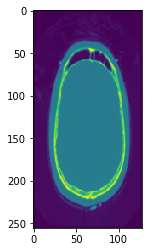

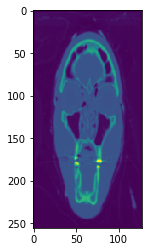

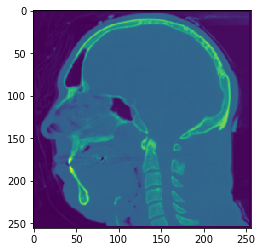

In [5]:
#im = plt.plot(volume[125,:,100])
plt.imshow(volume[64,:,:]) # cut in height 

plt.figure()
plt.imshow(volume[:,64,:]) # cut in depth

plt.figure()
plt.imshow(volume[:,:,64]) # cut in width

In [19]:
slices = []
plots = []
rays = []
stds = []

pos = 140
for i in range(256):
    # I want to see the variation of intensity 
    plot = np.zeros((256,128,3))
    
    # The line that represents the ray over which I will analyze the intensity
    ray = np.zeros((256,128,1))
    ray[pos,:] = 255;
    
    # This is the line to analyze the variation of intensity
    line = volume[pos,i,:]
    
    # I want to analyse the std throughout the ray
    std =  np.zeros((256,128,1))
    values = []
        
    # acc_opacity
    acc_opacity = 0
    intensities = []
    for j in range(128):        
        # actual value of intensity
        index = (int)(line[j])
        plot[index, j, 0] = 255
        
        # std of intensities up to now
        values.append(index)
        acc_std = int(np.round(np.std(values)))
        #plot[acc_std, j, 1] = 255
        
        # average of intensities up to now
        acc_mean = int(np.round(np.mean(values)))
        #plot[acc_mean, j, 2] = 255
        
        # accumulated intenstiy up to now
        acc_int = int(np.round(np.sum(values)))
        if acc_int > 255:
            acc_int = 255
            
        #plot[acc_int, j, 0] = 255
        #plot[acc_int, j, 1] = 255
        
        # accumulated opacity as per formula
        alpha_cur = index / 255.0
        acc_opacity = alpha_cur + (1 - alpha_cur) * acc_opacity;
                
        opacity = int(acc_opacity * 255)
        #plot[opacity, j, 1] = 255
        #plot[opacity, j, 2] = 255
        
        # intensity with variation
        intensity = 0
        if j > 0:
            intensity = (1 - acc_opacity) * line[j - 1]
            
        intensity = int(intensity)
        plot[intensity, j, 0] = 255
        plot[intensity, j, 1] = 255
        plot[intensity, j, 2] = 255
        
        intensities.append(intensity)
        acc_intensity = np.sum(intensities)
        #plot[acc_intensity, j, 0] = 255
        plot[acc_intensity, j, 2] = 255            
        
    plot = np.flip(plot, 0)
    stds.append(std)
    rays.append(ray)
    plots.append(plot)
    slices.append(volume[:,i,:].reshape((256,128,1)))

fps = 32
slice_clip = ImageSequenceClip(slices, 32)
plot_clip = ImageSequenceClip(plots, 32)
ray_clip = ImageSequenceClip(rays, 32)
std_clip = ImageSequenceClip(stds, 32)

video_clip = clips_array([[ray_clip, slice_clip, plot_clip]])
video_clip.write_videofile("man.mp4")
video_clip.write_gif("man.gif")
    

[MoviePy] >>>> Building video man.mp4
[MoviePy] Writing video man.mp4


100%|█████████▉| 256/257 [00:04<00:00, 52.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: man.mp4 


[MoviePy] Building file man.gif with imageio


100%|█████████▉| 256/257 [00:19<00:00, 13.55it/s]
